# Two-Asset HANK model

**Table of contents**<a id='toc0_'></a>    
- 1. [Stationary equilibrium](#toc1_)    
  - 1.1. [Distributions](#toc1_1_)    
  - 1.2. [MPCs](#toc1_2_)    
- 2. [Compute Jacobians](#toc2_)    
- 3. [Monetary policy shock](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKTwoAssetModel import HANKTwoAssetModelClass

## 1. <a id='toc1_'></a>[Stationary equilibrium](#toc0_)

In [2]:
model = HANKTwoAssetModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [4]:
model.find_ss(do_print=True)

find beta for market clearing
 beta =   0.995100000000 -> ss.clearing_Y =   0.000080492593 [17.6 secs]
 beta =   0.995100000000 -> ss.clearing_Y =   0.000080492593 [10.5 secs]
 beta =   0.995100000000 -> ss.clearing_Y =   0.000080492593 [10.3 secs]
 beta =   0.995100014828 -> ss.clearing_Y =   0.000080455442 [10.0 secs]
 beta =   0.995132126984 -> ss.clearing_Y =  -0.000000325477 [10.1 secs]
 beta =   0.995131997599 -> ss.clearing_Y =   0.000000001318 [10.1 secs]
 beta =   0.995131998121 -> ss.clearing_Y =   0.000000000000 [10.0 secs]
 beta =   0.995131998121 -> ss.clearing_Y =   0.000000000000 [10.7 secs]

final evaluation
 beta =   0.995131998121 -> ss.clearing_Y =   0.000000000000 [10.7 secs]

steady state found in 1.0 mins 40 secs
 beta   = 0.9951
 nu     = 0.6763

Discrepancy in Y =   0.00000000
Discrepancy in A =   0.00000000
Discrepancy in L =  -0.00000000


note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 6.9 secs
household problem simulated along transition in 3.4 secs



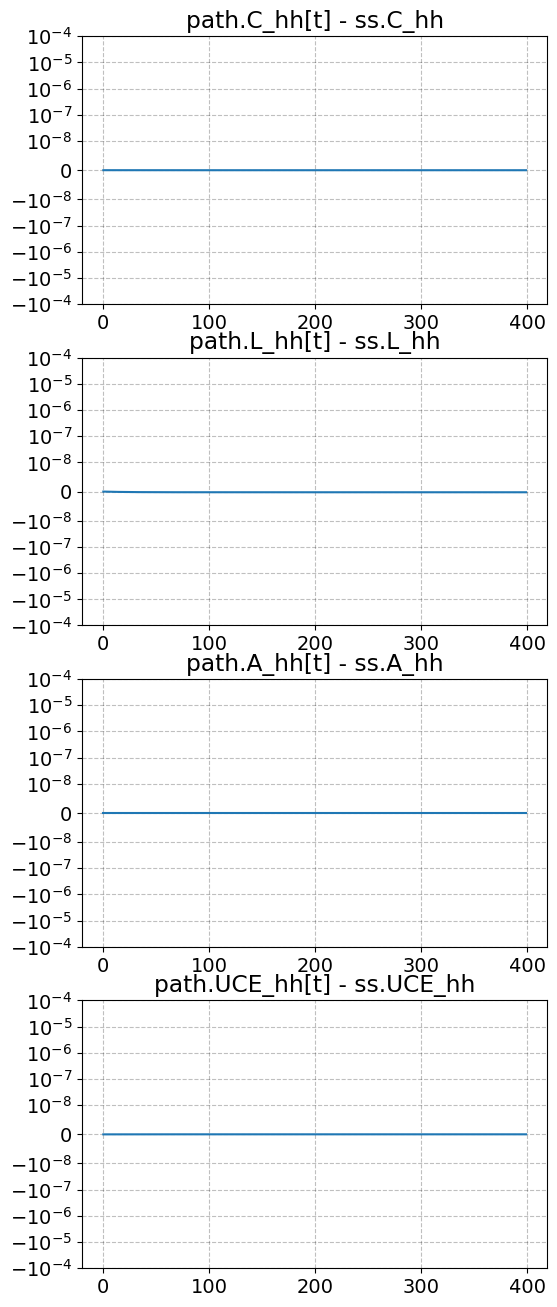

In [5]:
model.test_hh_path()

In [6]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  3.5e-10, max abs.  5.9e-10
B              : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 = -3.5e-10, max abs.  5.9e-10
clearing_L     : t0 =  3.5e-10, max abs.  3.5e-10
clearing_Y     : t0 = -5.6e-12, max abs.  1.4e-11
Div_int        : t0 =  0.0e+00, max abs.  0.0e+00
Div_k          : t0 =  0.0e+00, max abs.  0.0e+00
Div            : t0 =  0.0e+00, max abs.  0.0e+00
eg             : t0 =  0.0e+00, max abs.  0.0e+00
em             : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
I              : t0 =  0.0e+00, max abs.  0.0e+00
Ip             : t0 =  0.0e+00, max abs.  0.0e+00
K              : t0 =  0.0e+00, max abs.  0.0e+00
L              : t0 = -3.5e-10, max abs.  5.9e-10
N              : t0 =  0.0e+00, max abs.  0.0e+00
p_eq           : t0

### 1.1. <a id='toc1_1_'></a>[Distributions](#toc0_)

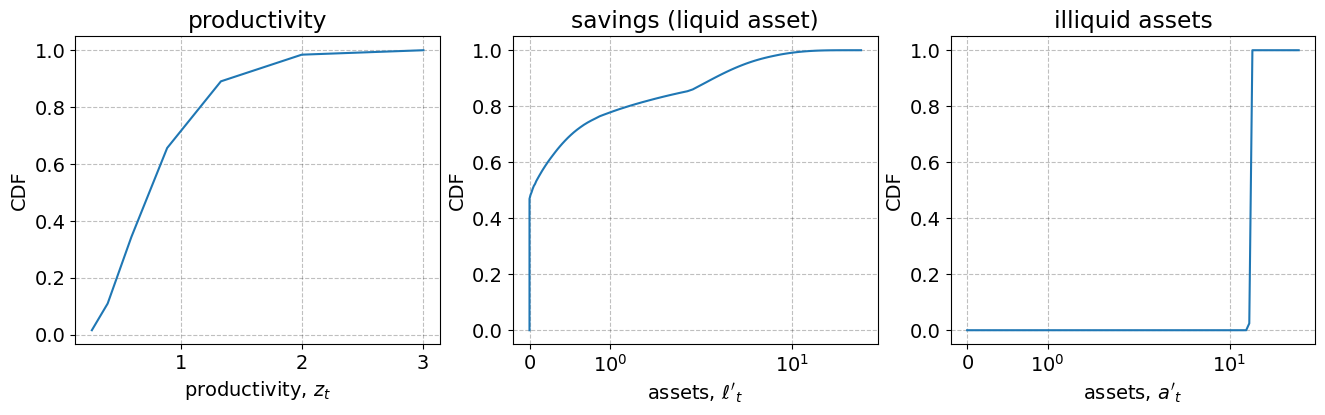

In [7]:
fig = plt.figure(figsize=(16,4),dpi=100)

# a. income
ax = fig.add_subplot(1,3,1)
ax.set_title('productivity')
ax.plot(par.z_grid,np.cumsum(np.sum(ss.D,axis=(0,2,3))))

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. liquid assets
ax = fig.add_subplot(1,3,2)
ax.set_title('savings (liquid asset)')
ax.plot(np.insert(par.l_grid,0,par.l_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1,3))),0,0.0),label='discrete')
ax.set_xlabel('assets, $\ell\'_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

# c. illiquid assets
ax = fig.add_subplot(1,3,3)
ax.set_title('illiquid assets')
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1,2))),0,0.0),label='discrete')
ax.set_xlabel('assets, $a\'_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

### 1.2. <a id='toc1_2_'></a>[MPCs](#toc0_)

In [8]:
# for liquid assets
MPC = np.zeros(ss.D.shape)
dc = (ss.c[:, :, 1:, :] - ss.c[:, :, :-1, :])
l_grid_full = np.repeat(par.l_grid, par.Na).reshape(1,1,par.Nl,par.Na)
dl = (1 + ss.rl) * l_grid_full[:, :, 1:, :] - (1 + ss.rl) * l_grid_full[:, :, :-1, :]
MPC[:, :, :-1, :] = dc / dl
MPC[:, :, -1, :] = MPC[:, :, -2, :]  # assuming constant MPC at end
mean_MPC = np.sum(MPC * ss.D)
mean_MPC_ann = 1 - (1 - mean_MPC) ** 4
print(f'mean MPC: {mean_MPC:.3f} [annual: {mean_MPC_ann:.3f}]')

mean MPC: 0.354 [annual: 0.826]


In [9]:
# for illiquid assets
MPC = np.zeros(ss.D.shape)
dc = (ss.c[:, :, :, 1:] - ss.c[:, :, :, :-1])
a_grid_full = np.repeat(par.a_grid, par.Nl).reshape(1,1,par.Nl,par.Na).swapaxes(2,3)
da = (1 + ss.ra) * a_grid_full[:, :, :, 1:] - (1 + ss.ra) * a_grid_full[:, :, :, :-1]
MPC[:, :, :, :-1] = dc / da
MPC[:, :, :, -1] = MPC[:, :, :, -2]  # assuming constant MPC at end
mean_MPC = np.sum(MPC * ss.D)
# mean_MPC_ann = 1 - (1 - mean_MPC) ** 4
# print(f'mean MPC: {mean_MPC:.3f} [annual: {mean_MPC_ann:.3f}]')
print(f'mean MPC out of illiquid assets: {mean_MPC:.3f} (annual terms)')

mean MPC out of illiquid assets: 0.024 (annual terms)


## 2. <a id='toc2_'></a>[Compute Jacobians](#toc0_)

In [10]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Z               in 8.1 secs
curly_Y and curly_D calculated for ra              in 8.4 secs
curly_Y and curly_D calculated for rl              in 8.2 secs
curly_E calculated in 5.6 secs
builiding blocks combined in 0.4 secs
household Jacobian computed in 30.6 secs

full Jacobians:
full Jacobian to unknowns computed in 7.9 secs [in evaluate_path(): 4.2 secs]
full Jacobian to shocks computed in 4.6 secs [in evaluate_path(): 1.6 secs]


## 3. <a id='toc3_'></a>[Monetary policy shock](#toc0_)

In [11]:
model.find_transition_path(do_print=True,do_end_check=False)

finding the transition path:
 it =   0 -> max. abs. error = 4.29e-04
   4.29e-04 in fisher_res
   0.00e+00 in w_res
   1.38e-11 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in valuation_res
   0.00e+00 in NKPC_res
   1.08e-11 in NKPC_w_res
 it =   1 -> max. abs. error = 5.51e-05
   1.42e-07 in fisher_res
   2.30e-06 in w_res
   1.62e-05 in clearing_Y
   5.51e-05 in invest_res
   2.82e-06 in valuation_res
   8.59e-18 in NKPC_res
   3.93e-05 in NKPC_w_res
 it =   2 -> max. abs. error = 1.50e-05
   9.40e-10 in fisher_res
   2.21e-08 in w_res
   4.46e-07 in clearing_Y
   1.50e-05 in invest_res
   4.81e-09 in valuation_res
   4.48e-18 in NKPC_res
   3.16e-07 in NKPC_w_res
 it =   3 -> max. abs. error = 4.69e-07
   2.99e-11 in fisher_res
   8.45e-10 in w_res
   1.92e-08 in clearing_Y
   4.69e-07 in invest_res
   1.12e-10 in valuation_res
   1.43e-18 in NKPC_res
   1.73e-08 in NKPC_w_res
 it =   4 -> max. abs. error = 1.37e-08
   1.67e-13 in fisher_res
   1.39e-11 in w_res
   4.39e-10 

### shocks ###


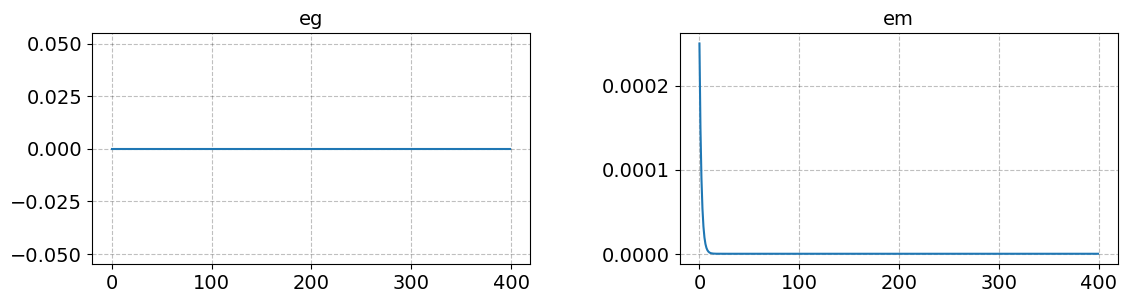


### varnames ###


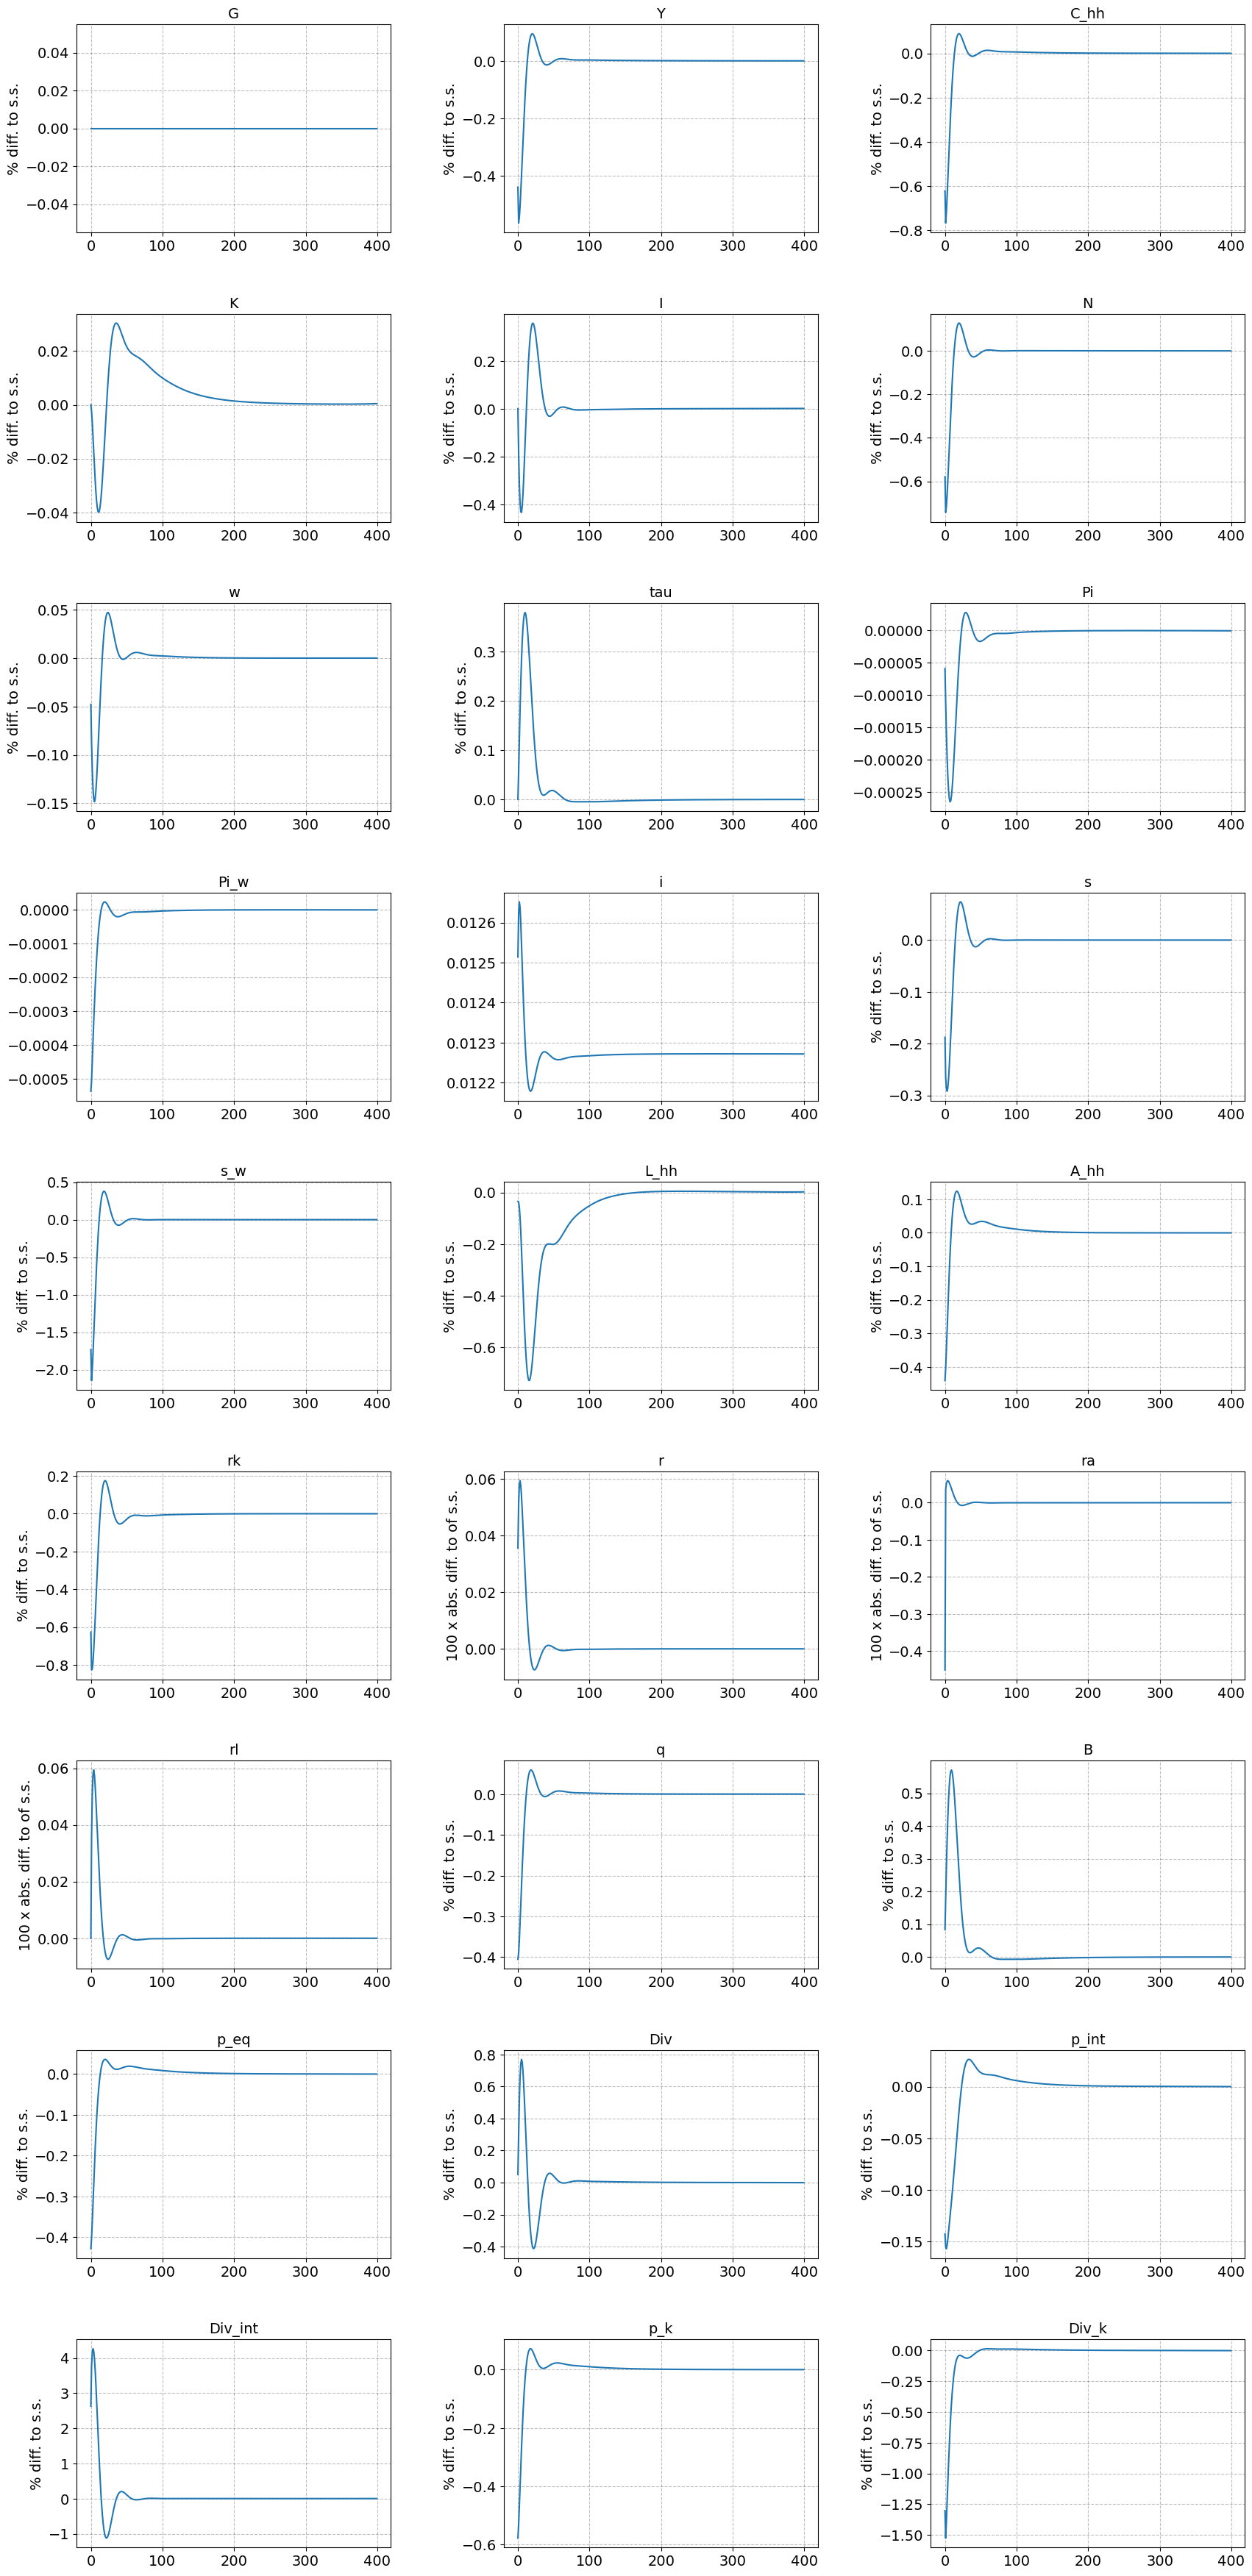


### tagets ###


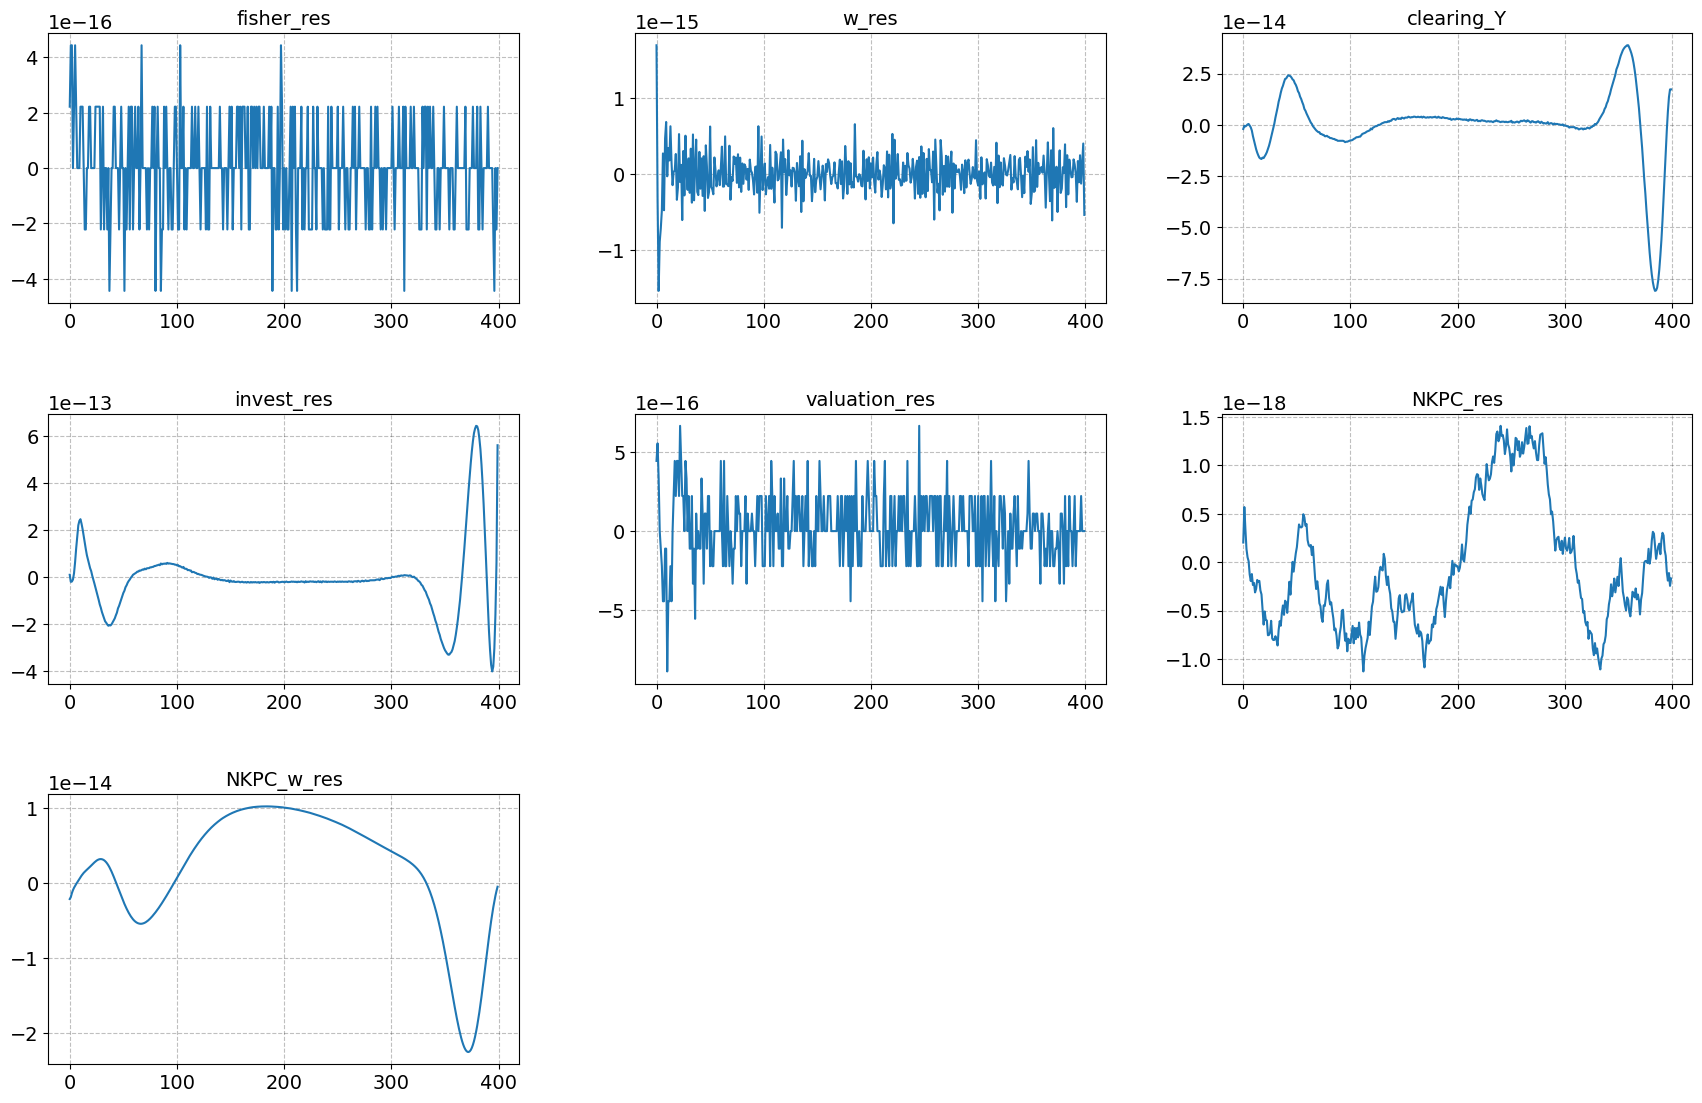

In [12]:
paths = ['G', 'Y', 'C_hh', 'K', 'I',
         'N', 'w', 'tau', 'Pi', 'Pi_w', 'i', 's', 's_w',
         'L_hh', 'A_hh',
         'rk', 'r','ra', 'rl',
         'q', 'B',
         'p_eq', 'Div', 'p_int', 'Div_int', 'p_k', 'Div_k']
paths_short = ['Y', 'C_hh', 'K', 'I', 'N', 'w']
lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}
# model.show_IRFs(paths,abs_diff=abs_diff,facs=facs,ncols=3,T_max=100)
model.show_IRFs(paths, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3, do_shocks=True)